# Plot the data for a specific subid

Read from the results file and plot a specifc file in the required format.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np
import math

from modules.config import GRAPH_DIR, PLOT_TITLE

Declare constants

In [2]:
from modules.config import (RESULTS_DIR, 
                            RESULTS_FILE,
                            NETWORK_DIR,
            )
RUNID = '20251109-18-45-56' #add your Runid here
SUBID = '18-45-56' #add your Subid here
DANTZIG42_DATA = 'dantzig42_xy.csv'

Load relevant data from results file:

In [3]:
if RUNID:
    
    results_file = Path(RESULTS_DIR).joinpath(RESULTS_FILE)
    df_summary = pd.read_csv(results_file)
    df_summary = df_summary[df_summary['runid'] == RUNID]
    df_summary = df_summary[df_summary['subid'] == SUBID]
    df_summary.head()
    best = df_summary['best_dist'].astype(float)

Load detailed data:

In [4]:
if SUBID:
    filename  = f'{SUBID}.csv'
    df_detailed = pd.read_csv(Path(RESULTS_DIR).joinpath(RUNID,filename))
    df_detailed.drop('index_list', axis=1, inplace=True)
    df_detailed['best_dist'] = best.values[0]
    df_detailed.head()

Plot graph

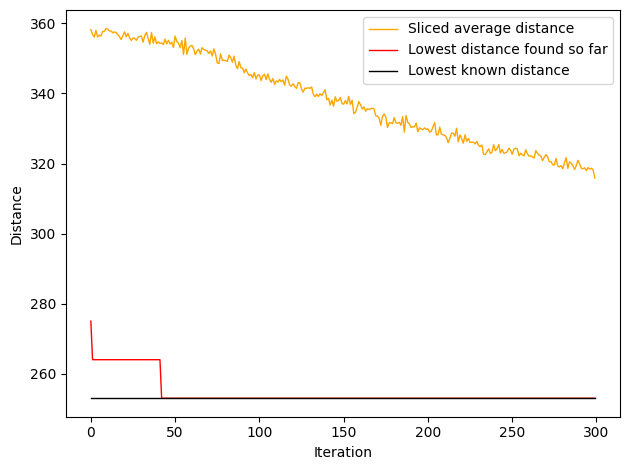

In [5]:
if RUNID:
    #plt.plot(df_detailed.index, df_detailed['average_list'], linewidth=1.0, color = 'blue', label='Simple average distance')
    plt.plot(df_detailed.index, df_detailed['sliced_list'], linewidth=1.0, color = 'orange', label='Sliced average distance')
    plt.plot(df_detailed.index, df_detailed['lowest_list'], linewidth=1.0, color = 'red', label='Lowest distance found so far')
    plt.plot(df_detailed.index, df_detailed['best_dist'], linewidth=1.0, color = 'black', label='Lowest known distance')
    title = 'Average_and_lowest_distance_found by_iteration'
    if PLOT_TITLE:
        plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.legend()
    plt.tight_layout()

    filename = Path(GRAPH_DIR).joinpath(f'{title}.pdf')
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# Plot Dantzig 42 

In [6]:
filename = Path(NETWORK_DIR).joinpath(DANTZIG42_DATA)
print(f'Loading data from {filename}')
df = pd.read_csv(filename)
df.head()


Loading data from networks\dantzig42_xy.csv


,Location,x,y
0,1,170.0,85.0
1,2,166.0,88.0
2,3,133.0,73.0
3,4,140.0,70.0
4,5,142.0,55.0


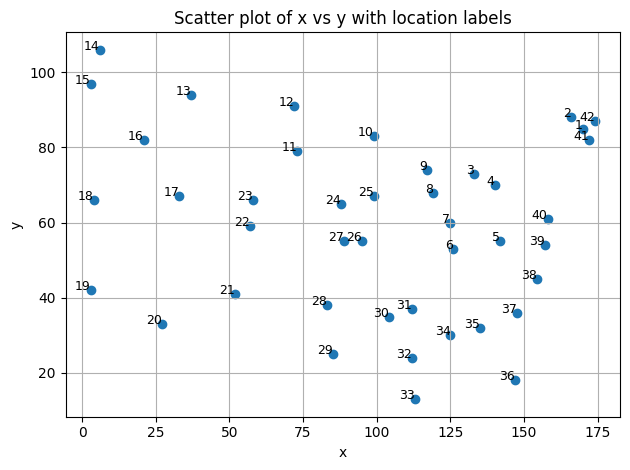

In [7]:
# Scatter plot
plt.scatter(df['x'], df['y'])

# Add labels from 'location' column
for i, row in df.iterrows():
    plt.text(row['x'], row['y'], str(row['Location']), fontsize=9, ha='right')

# Axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y with location labels')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\DanielGoldsmith\AppData\Local\Temp\ipykernel_22948\1372212427.py:78: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


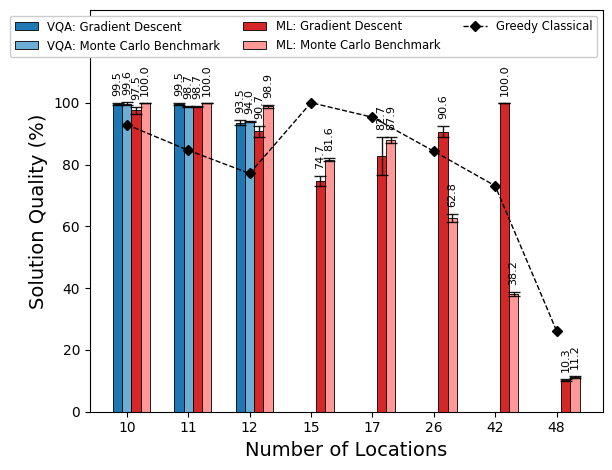

In [8]:
locations = ['10', '11', '12', '15', '17', '26', '42', '48']

simulation_means = {
    'VQA: Gradient Descent':    (99.5, 99.5, 93.5, np.nan, np.nan, np.nan, np.nan, np.nan),
    'VQA: Monte Carlo Benchmark':   (99.6, 98.7, 94.0, np.nan, np.nan, np.nan, np.nan, np.nan),
    'ML: Gradient Descent':                (97.5, 98.7, 90.7, 74.7, 82.7, 90.6, 100.0, 10.3),
    'ML: Monte Carlo Benchmark':    (100, 100, 98.9, 81.6, 87.9, 62.8, 38.2, 11.2)
}

simulation_errors = {
    'VQA: Gradient Descent':    (0.4, 0.3, 0.8, np.nan, np.nan, np.nan, np.nan, np.nan),
    'VQA: Monte Carlo Benchmark':   (0.5, 0.2, 0.1, np.nan, np.nan, np.nan, np.nan, np.nan),
    'ML: Gradient Descent':                (1.1, 0.2, 1.8, 1.7, 6.1, 1.8, 0.0, 0.2),
    'ML: Monte Carlo Benchmark':    (0.0, 0.0, 0.5, 0.5, 1.0, 1.3, 0.6, 0.25)
}

colors = {
    'VQA: Gradient Descent': '#1f77b4',      # blue
    'VQA: Monte Carlo Benchmark': '#6baed6',     # lighter blue
    'ML: Gradient Descent': '#d62728',                  # red
    'ML: Monte Carlo Benchmark': '#ff9896'       # lighter red/pink
}

# Greedy Classical (line)
greedy_classical = [92.9, 84.6, 77.1, 100.0, 95.3, 84.3, 73.1, 26.2]

x = np.arange(len(locations))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in simulation_means.items():
    offset = width * multiplier
    errors = simulation_errors[attribute]
    color = colors[attribute]
    rects = ax.bar(x + offset, measurement, width, label=attribute,
                   yerr=errors, capsize=4, error_kw={'elinewidth': 1, 'alpha': 0.9},
                   color=color, edgecolor='black', linewidth=0.6
                   )
    ax.bar_label(rects, padding=5, fmt='%.1f', label_type='edge', fontsize=8, rotation=90)
    multiplier += 1

    
# --- Now add Greedy Classical line (centered over grouped bars) ---
num_bar_groups = 4  # total plotted groups including spacing
group_width = width * (num_bar_groups - 1)
center_offset = group_width / 2 - width / 2  # center alignment

#)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Locations', fontsize=14)
ax.set_ylabel('Solution Quality (%)', fontsize=14)
if PLOT_TITLE:  
    ax.set_title('Solution Quality by Number of Locations for VQA, ML, Monte Carlo and Greedy methods')
ax.set_xticks(x + width, locations)
ax.set_ylim(0, 130)

ax.plot(
    x + center_offset, greedy_classical,
    color='black', marker='D', linestyle='--',
    linewidth=1, markersize=5, label='Greedy Classical'
)

# --- Reorder legend so "Greedy Classical" appears last ---
handles, labels = ax.get_legend_handles_labels()

# Move "Greedy Classical" to the end
if "Greedy Classical" in labels:
    idx = labels.index("Greedy Classical")
    # Pop and append to end
    handles.append(handles.pop(idx))
    labels.append(labels.pop(idx))

ax.legend(handles, labels, loc='upper right', ncols=3, fontsize='small', framealpha=1)

plt.tight_layout()

filename = Path(GRAPH_DIR).joinpath(f'solution_quality_by_method.pdf')
plt.savefig(filename, bbox_inches='tight')

plt.show()

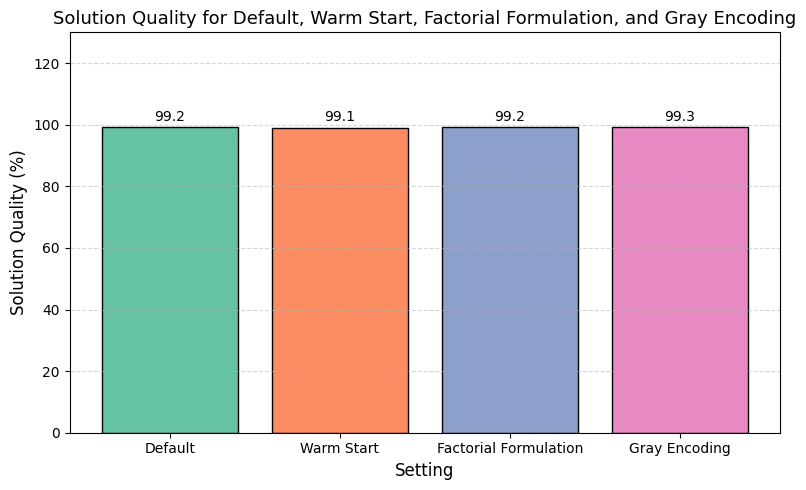

In [9]:
# Data
setting = ['Default', 'Warm Start', 'Factorial Formulation', 'Gray Encoding']
simulation_means = [99.2, 99.1, 99.2, 99.3]

# Colors
colors = sns.color_palette("Set2", n_colors=len(simulation_means))

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(setting, simulation_means, color=colors, edgecolor='black')

# Labels and styling
plt.xlabel('Setting', fontsize=12)
plt.ylabel('Solution Quality (%)', fontsize=12)
plt.title('Solution Quality for Default, Warm Start, Factorial Formulation, and Gray Encoding', fontsize=13)
plt.ylim(0, 130)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Limit: 1028096


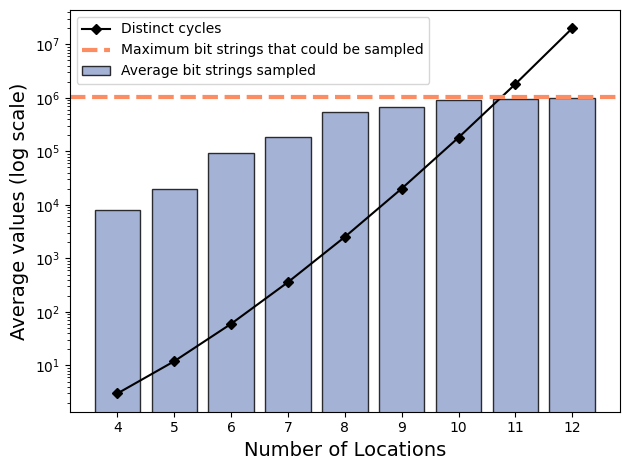

In [10]:

"""Plot permutations vs total cache calls."""
locations = [4, 5, 6, 7, 8, 9, 10, 11, 12]

permutations = []
for loc in locations:
    p = 0.5 * math.factorial(loc - 1)
    permutations.append(p)

total_cache_calls = [7_947, 19_661, 94_151, 187_519, 549_048, 681_525, 
                        896_274, 957_261, 1_011_155]

limit = 4 * 251 * 1_024
print(f'Limit: {limit}')

# Choose Set2 colors
#colors = sns.color_palette("Set2")
colors = sns.color_palette("Set2", n_colors=4)

plt.bar(
    locations,
    total_cache_calls,
    color=colors[2],
    alpha=0.8,
    edgecolor='black',
    label='Average bit strings sampled',
)
plt.yscale('log')  # Log scale for the bar axis
plt.ylabel('Average values (log scale)', fontsize=14)
plt.tick_params(axis='y',)

plt.plot(
    locations,
    permutations,
    marker='D',
    markersize=5,
    color='black',
    label='Distinct cycles',
)

plt.axhline(
    y=limit,
    color=colors[1],
    linestyle='--',
    linewidth=3,
    label='Maximum bit strings that could be sampled',
)

# --- Formatting ---
title = 'Permutations_and_Total_Cache_Calls_by_Location'
if PLOT_TITLE:
    plt.title(title, fontsize=18)
plt.xlabel("Number of Locations", fontsize=14)
plt.xticks(locations)
plt.legend(loc='upper left',)

# --- Layout adjustments ---
plt.tight_layout()

filename = Path(GRAPH_DIR).joinpath(f'{title}.pdf')
plt.savefig(filename, bbox_inches='tight')

plt.show()